In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Set up canvas dimensions and initialize with ones (white background)
canvas_height, canvas_width = 1300, 1400
canvas = np.ones((canvas_height, canvas_width), dtype=int)  # White background

# Pixel plotting function with black pixels
def set_pixel(x, y):
    if 0 <= x < canvas_width and 0 <= y < canvas_height:
        canvas[y, x] = 0  # Set pixel to black

In [2]:
# Drawing circle symmetry points
def draw_circle(xc, yc, x, y):
    set_pixel(xc + x, yc + y)
    set_pixel(xc - x, yc + y)
    set_pixel(xc + x, yc - y)
    set_pixel(xc - x, yc - y)
    set_pixel(xc + y, yc + x)
    set_pixel(xc - y, yc + x)
    set_pixel(xc + y, yc - x)
    set_pixel(xc - y, yc - x)

# Bresenham's Circle Algorithm
def bresenham_circle(x_center, y_center, radius):
    x = 0
    y = radius
    d = 3 - 2 * radius
    draw_circle(x_center, y_center, x, y)
    while y >= x:
        x += 1
        if d > 0:
            y -= 1
            d = d + 4 * (x - y) + 10
        else:
            d = d + 4 * x + 6
        draw_circle(x_center, y_center, x, y)

In [3]:
# Bresenham's Line Algorithm function
def bresenham_line(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)

    # Handle vertical line
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            set_pixel(x0, y)
        return

    # Handle horizontal line
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            set_pixel(x, y0)
        return

    # Initialize decision variables
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    if dx >= dy:
        set_pixel(x, y)
        while x < x1:
            x += 1
            if d < 0:
                d += dS
            else:
                y += 1 if y1 > y0 else -1
                d += dT
            set_pixel(x, y)
    else:
        set_pixel(x, y)
        while y < y1:
            y += 1
            if d > 0:
                x += 1 if x1 > x0 else -1
                d -= 2 * dx
            d += dS
            set_pixel(x, y)

In [4]:
# Bresenham's Line Dashed Algorithm function
def bresenham_line_dashed(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    step = 0

    # Handle vertical line
    if dx == 0:
        for y in range(min(y0, y1), max(y0, y1) + 1):
            if step % 3 == 0:
                set_pixel(x0, y)
            step += 1  # Increment step
        return

    # Handle horizontal line
    if dy == 0:
        for x in range(min(x0, x1), max(x0, x1) + 1):
            if step % 3 == 0:
                set_pixel(x, y0)
            step += 1  # Increment step
        return

    # Initialize decision variables
    dT = 2 * (dy - dx)
    dS = 2 * dy
    d = 2 * dy - dx

    x, y = x0, y0
    if dx >= dy:
        if step % 3 == 0:
            set_pixel(x, y)
        step += 1  # Increment step
        while x < x1:
            x += 1
            if d < 0:
                d += dS
            else:
                y += 1 if y1 > y0 else -1
                d += dT
            if step % 3 == 0:
                set_pixel(x, y)
            step += 1  # Increment step
    else:
        if step % 3 == 0:
            set_pixel(x, y)
        step += 1  # Increment step
        while y < y1:
            y += 1
            if d > 0:
                x += 1 if x1 > x0 else -1
                d -= 2 * dx
            d += dS
            if step % 3 == 0:
                set_pixel(x, y)
            step += 1  # Increment step


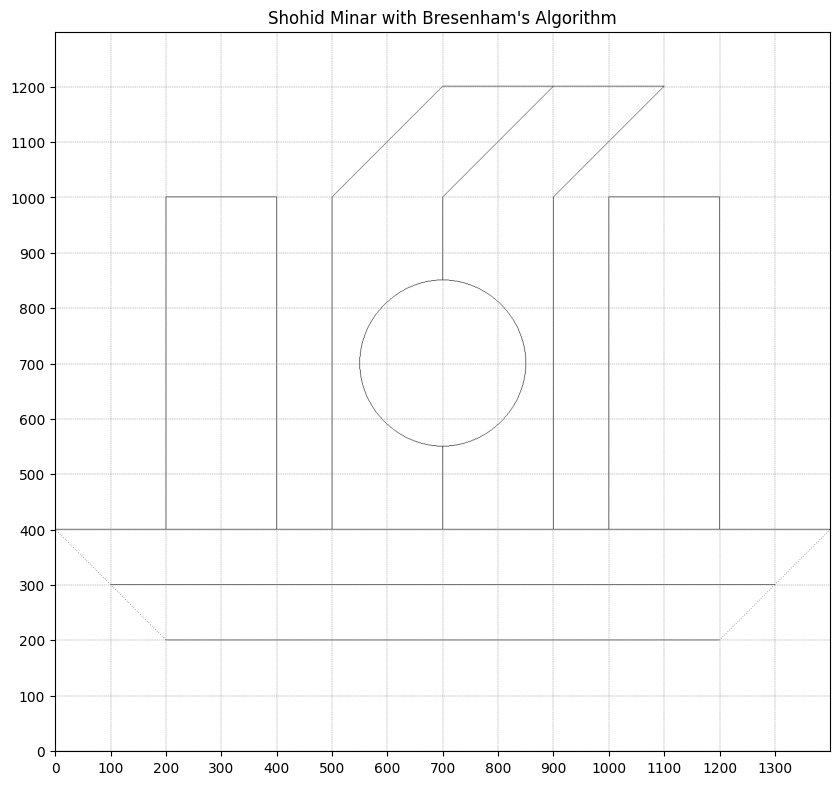

In [5]:
# Main drawing function for Shohid Minar
def display_drawings():
    # Left Shohid Minar
    bresenham_line(200, 400, 200, 1000)
    bresenham_line(200, 1000, 400, 1000)
    bresenham_line(400, 400, 400, 1000)

    # Center Shohid Minar
    bresenham_line(500, 400, 500, 1000)
    bresenham_line(900, 400, 900, 1000)
    bresenham_circle(700, 700, 150)
    bresenham_line(700, 400, 700, 550)
    bresenham_line(700, 850, 700, 1000)

    # Center Top Chura
    bresenham_line(500, 1000, 700, 1200)
    bresenham_line(700, 1000, 900, 1200)
    bresenham_line(900, 1000, 1100, 1200)
    bresenham_line(700, 1200, 1100, 1200)

    # Right Shohid Minar
    bresenham_line(1000, 400, 1000, 1000)
    bresenham_line(1000, 1000, 1200, 1000)
    bresenham_line(1200, 400, 1200, 1000)

    # Base
    bresenham_line(0, 400, 1400, 400)

    # Base - 1
    bresenham_line_dashed(0, 400, 100, 300)
    bresenham_line_dashed(1300, 300, 1400, 400)
    bresenham_line(100, 300, 1300, 300)

    # Base - 2
    bresenham_line_dashed(100, 300, 200, 200)
    bresenham_line_dashed(1200, 200, 1300, 300)
    bresenham_line(200, 200, 1200, 200)

    # Display canvas with grid
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(canvas, cmap="gray", origin="upper")
    ax.set_xticks(np.arange(0, canvas_width, 100))
    ax.set_yticks(np.arange(0, canvas_height, 100))
    ax.grid(color='gray', linestyle='--', linewidth=0.3)
    ax.set_title("Shohid Minar with Bresenham's Algorithm")
    plt.gca().invert_yaxis()  # Ensures y-axis is oriented upwards
    plt.show()

# Run the drawing function
display_drawings()
